/Users/jackgorsuch/anaconda3/envs/autogen/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 250)            │       263,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 250)            │        62,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 12)             │         3,012 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,775 (1.25 MB)

 Trainable params: 328,775 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1908
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1570
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1085
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1023
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0819
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0550
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0824
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0451
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0173
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0427
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0727
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0624
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0704
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0601
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0371
Epoch 

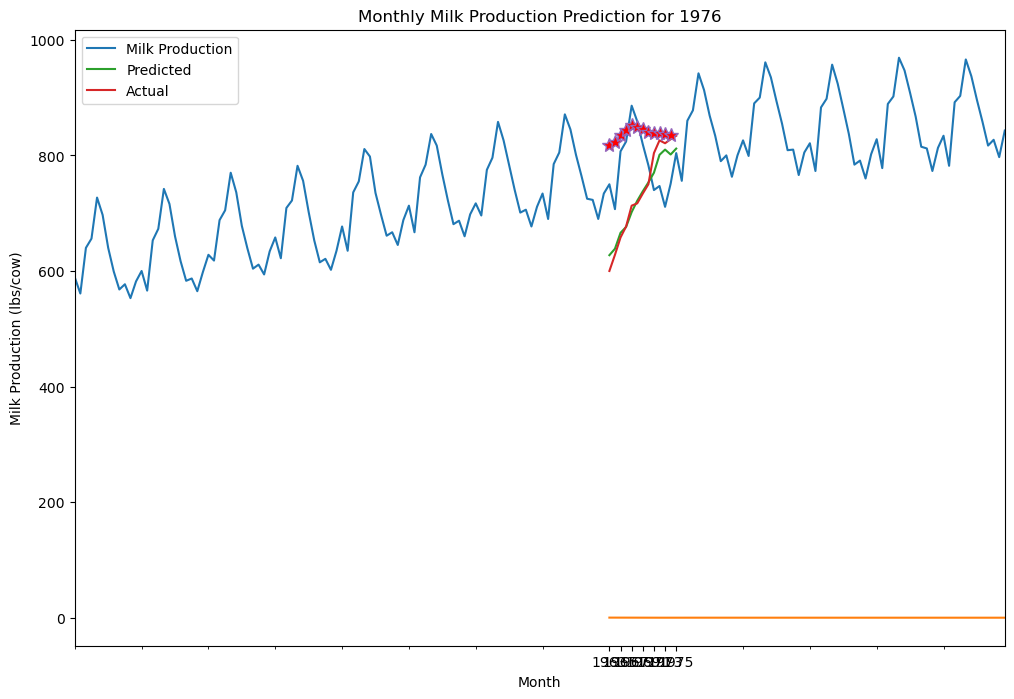

In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

# Data File Location
dataFile = '/Users/jackgorsuch/Desktop/monthly-milk-production-pounds.csv' 

# Read the input data
df = pd.read_csv(dataFile, index_col='Month')
df.rename(columns={'Monthly milk production (pounds per cow)': 'Milk Production'}, inplace=True)
df.index = pd.to_datetime(df.index)
df

# Plotting data
df.plot(title="Milk Production Data", ylabel="Milk Production (lbs/cow)", figsize=(12,8))

# Scaling Data
scaler = MinMaxScaler()
array = []
train_data = []
train_labels = []

for i in range(len(df)):
    array.append(df.iloc[i]['Milk Production'])

array = np.array(array).reshape(-1, 1)
array = scaler.fit_transform(array)
array

# Creating training data
k = 0
for i in range(len(array)):
    try:
        train_data.append(array[12 * k:12 * (k + 1)])
        train_labels.append(array[12 * (k + 1)])
        k += 1
    except:
        break

train_data = np.squeeze(train_data)
train_labels = np.array(train_labels)
train_data.shape

# Getting train data in shape
train_data = train_data[:len(train_labels)]
train_data = np.expand_dims(train_data, 1)
train_data.shape

# Checking train data
train_data[1]

# Checking train labels
train_labels[1]

# Creating a model
model = Sequential()
model.add(LSTM(250, input_shape=(1, 12)))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

# Training model
E = 1000
H = model.fit(train_data, train_labels, epochs=E)

# Plotting loss curve for Milk Production prediction model
epochs = range(0, E)
loss = H.history['loss']
plt.title("Model Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(epochs, loss)

# Plot of Predicted vs. Actual January Milk Production for 1963 to 1975
preds = scaler.inverse_transform(model.predict(train_data))
plt.title("Milk Production Prediction for January")
plt.xlabel("Year")
plt.ylabel("Milk Production (lbs/cow)")
plt.plot(range(0, 13), preds, label='Predicted')
plt.plot(range(0, 13), scaler.inverse_transform(train_labels), label='Actual')
plt.legend()

# Specify axis locations
x_ticks = [0, 2, 4, 6, 8, 10, 12]
x_labels = ['1963', '1965', '1967', '1969', '1971', '1973', '1975']
plt.xticks(ticks=x_ticks, labels=x_labels)

# Creating a seed for next year's Milk Production prediction
seed = array[-12:]
seed

# Show the seed shape
seed.shape

# Next year's Milk Production prediction
for _ in range(12):
    curr_12_months = seed[-12:]
    curr_12_months = np.squeeze(curr_12_months)
    curr_12_months = np.expand_dims(curr_12_months, 0)
    curr_12_months = np.expand_dims(curr_12_months, 0)
    pred = model.predict(curr_12_months)
    seed = np.append(seed, pred)

seed

# Plotting next year's Milk Production prediction
next_year_prediction = scaler.inverse_transform(seed[-12:].reshape(-1, 1))
plt.title("Monthly Milk Production Prediction for 1976")
plt.xlabel("Month")
plt.ylabel("Milk Production (lbs/cow)")
plt.plot(range(0, 12), next_year_prediction, marker='*', markerfacecolor='red', markersize=10)


In [1]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test and y_pred are the actual and predicted values respectively
# Replace the example values with your actual y_test and y_pred variables
y_test = [22, 20, 23, 21, 24, 22, 25, 23, 26, 24, 27, 25, 28, 26, 29, 27, 30, 28, 31, 29, 32, 30, 33, 31, 34, 32, 35, 33, 36, 34]  # Actual values
y_pred = [21, 19, 22, 20, 23, 21, 24, 22, 25, 23, 26, 24, 27, 25, 28, 26, 29, 27, 30, 28, 31, 29, 32, 30, 33, 31, 34, 32, 35, 33]  # Predicted values

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)


Mean Squared Error (MSE): 1.0
Root Mean Squared Error (RMSE): 1.0
